<a href="https://colab.research.google.com/github/ra-vb/python_code/blob/main/Rabiyathul_misriya_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
#importing the data set
df=pd.read_csv("/content/Wine_clust  (1).csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [80]:
df.shape

(178, 13)

In [81]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [83]:
df.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


<Axes: >

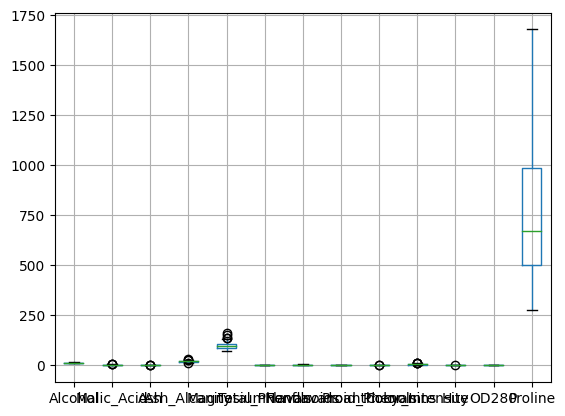

In [84]:
df.boxplot()

In [85]:
numerical_cols = df.select_dtypes(include=['number']).columns
print(numerical_cols)

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')


In [86]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).sum()
print(outliers)

# Replace outliers with mean
for col in numerical_cols:
    mean_val = df[col].mean()
    df[col] = np.where((df[col] < lower_bound[col]) | (df[col] > upper_bound[col]), mean_val, df[col])


Alcohol                 0
Malic_Acid              3
Ash                     3
Ash_Alcanity            4
Magnesium               4
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         2
Color_Intensity         4
Hue                     1
OD280                   0
Proline                 0
dtype: int64


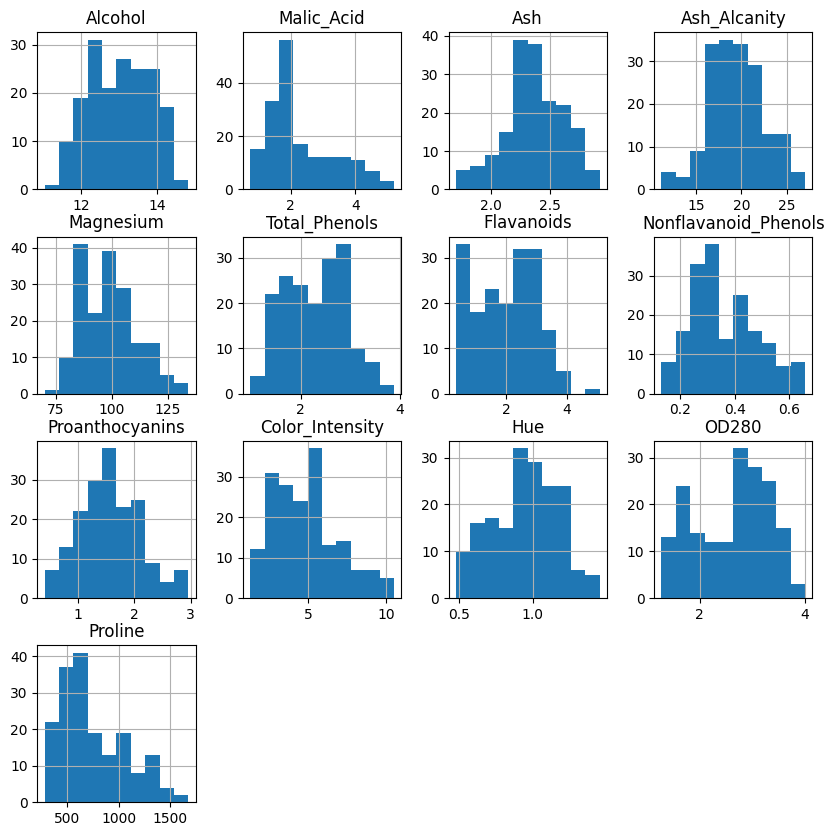

In [87]:
df.hist(figsize =(10,10))
plt.show()

In [88]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.556112,0.273525,-1.254465,2.319053,0.808997,1.034819,-0.659563,1.343371,0.348863,0.393021,1.847920,1.013009
1,0.246290,-0.487870,-0.902065,-2.712869,0.108124,0.568648,0.733629,-0.820719,-0.541695,-0.254968,0.438311,1.113449,0.965242
2,0.196879,0.077557,1.246427,-0.260099,0.190010,0.808997,1.215533,-0.498407,2.313900,0.368033,0.347731,0.788587,1.395148
3,1.691550,-0.322142,0.557288,-0.856719,1.172645,2.491446,1.466525,-0.981875,1.138067,1.384003,-0.422202,1.184071,2.334574
4,0.295700,0.301778,2.057179,0.535394,1.582077,0.808997,0.663351,0.226796,0.466162,-0.283722,0.393021,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,0.054500,0.354600,0.369666,-0.301308,-0.985614,-1.424900,1.274310,-0.952303,1.336080,-1.418586,-1.231206,-0.021952
174,0.493343,1.588614,0.476213,1.198305,0.271896,-0.793334,-1.284344,0.549108,-0.299063,1.144388,-1.146845,-1.485445,0.009893
175,0.332758,1.949317,-0.415614,0.203939,1.745849,-1.129824,-1.344582,0.549108,-0.411047,2.534159,-1.645037,-1.485445,0.280575
176,0.209232,0.301778,0.030300,0.203939,1.745849,-1.033684,-1.354622,1.354888,-0.205743,2.102850,-1.599747,-1.400699,0.296498


In [89]:
x=df.iloc[:,:].values
x

array([[ 1.51861254, -0.55611176,  0.27352504, ...,  0.39302085,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.4878705 , -0.90206483, ...,  0.43831103,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.0775571 ,  1.24642701, ...,  0.34773066,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.94931742, -0.41561385, ..., -1.64503741,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.30177839,  0.03029955, ..., -1.59974723,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.77383989,  1.53019008, ..., -1.55445704,
        -1.42894777, -0.59516041]])

**K-Means clustering Using elbow method**

In [90]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42,n_init='auto')
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
  wcss

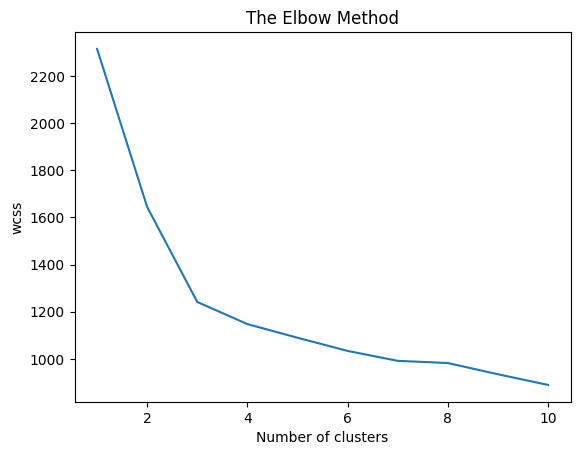

In [91]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [92]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42,n_init='auto')
y_pred=kmeans.fit_predict(x)

In [93]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

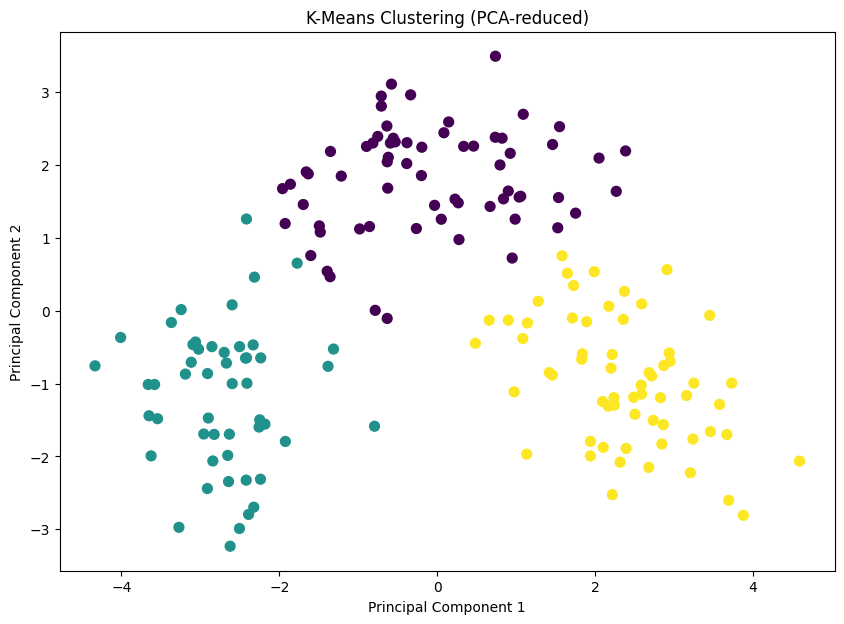

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

# Add PCA components to the DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = y_pred

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [95]:
# find sihoutt score
from sklearn.metrics import silhouette_score
silhoutte_km=silhouette_score(x,y_pred)
print("K-Mean",silhoutte_km)

K-Mean 0.28662042730979553


Silhouette score ranges from -1 to 1. Better-defined clusters are denoted by higher scores. Scores close to 1 suggests that the samples are well-clustered and separated, while a score close to -1 indicates overlapping or poorly separated clusters. The silhouette score of 0.2 suggests that the clustering algorithm might not have successfully identified distinct and well-defined clusters in the data

**Agglomerative clustering**

In [96]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [97]:
# Extracting the useful features from the dataset
X = df.iloc[:,:].values
mergings=linkage(X,method='ward')

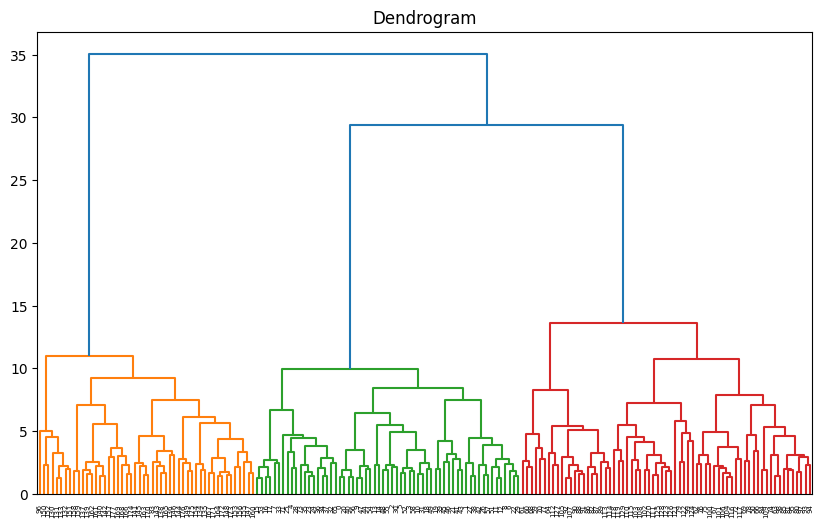

In [98]:
# Finding the optimal no.of Clusters by Dendrograms
plt.figure(figsize=(10, 6))
plt.title('Dendrogram')
dendrogram(mergings)
plt.show()

In [99]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
pred = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


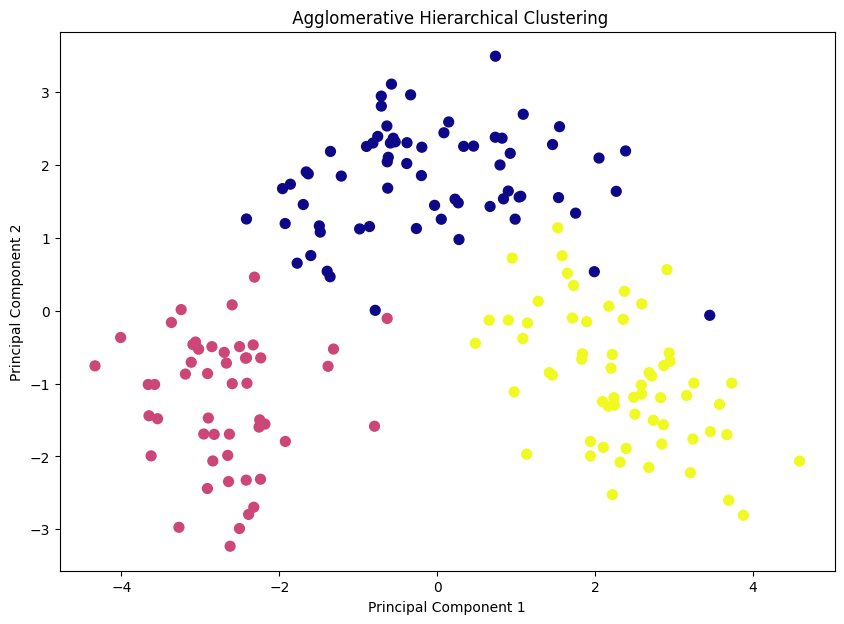

In [106]:
df_pca['Cluster'] = pred
# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='plasma', s=50)
plt.title(' Agglomerative Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [101]:
from sklearn.metrics import silhouette_score
silhoutte_agg=silhouette_score(X,pred)
print("agglomerative",silhoutte_agg)

agglomerative 0.2801563185381443


Silhouette score ranges from -1 to 1. Better-defined clusters are denoted by higher scores. Scores close to 1 suggests that the samples are well-clustered and separated, while a score close to -1 indicates overlapping or poorly separated clusters. The silhouette score of 0.2 suggests that the clustering algorithm might not have successfully identified distinct and well-defined clusters in the data

3. **dB Scan Clustering**

In [102]:
X = df.iloc[:,:].values

In [103]:
X

array([[ 1.51861254, -0.55611176,  0.27352504, ...,  0.39302085,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.4878705 , -0.90206483, ...,  0.43831103,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.0775571 ,  1.24642701, ...,  0.34773066,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.94931742, -0.41561385, ..., -1.64503741,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.30177839,  0.03029955, ..., -1.59974723,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.77383989,  1.53019008, ..., -1.55445704,
        -1.42894777, -0.59516041]])

In [104]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=3, min_samples=5).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 7


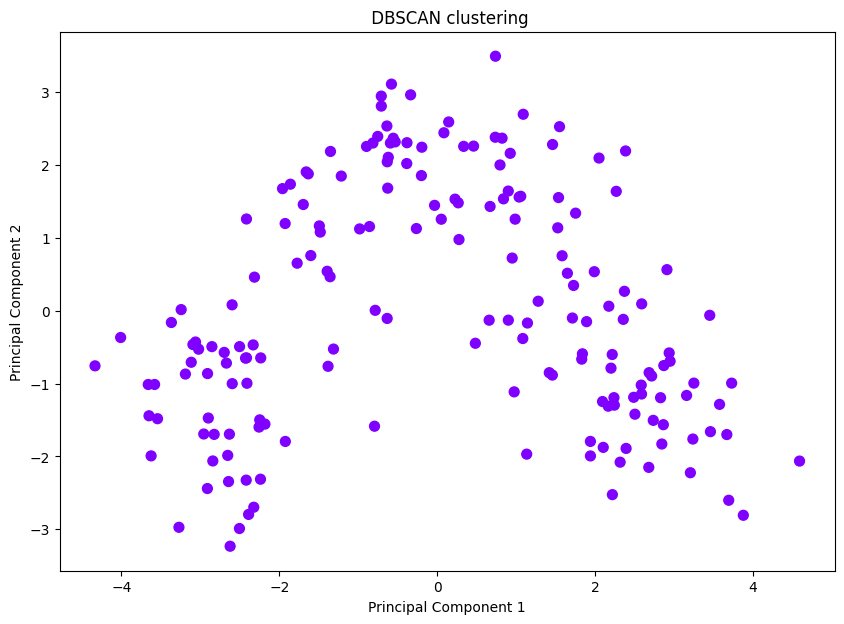

In [105]:
# plotting dB scan clustering
df_pca['Cluster'] = n_clusters_
plt.figure(figsize=(10, 7))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='rainbow', s=50)
plt.title(' DBSCAN clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()